In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [170]:
x = np.random.rand(20)
y = np.random.rand(20)

In [171]:
df = pd.DataFrame({"X":x, "Y":y})

In [172]:
df

,X,Y
0,0.307479,0.604840
1,0.125737,0.551497
2,0.426984,0.295713
3,0.223677,0.975918
4,0.307710,0.091262
5,0.762110,0.041407
6,0.338453,0.581165
7,0.411747,0.972771
8,0.485390,0.956346
9,0.360032,0.371044


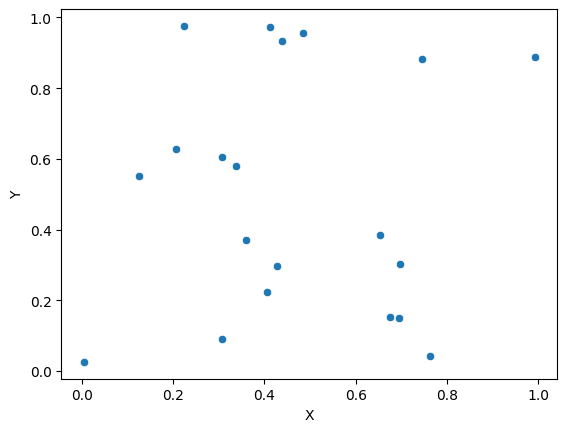

In [173]:
sns.scatterplot(x=df["X"], y=df["Y"])
plt.show()

In [174]:
# Decide the number of k
k = 2

In [175]:
# Assign the random centroids from given data
df.sample(2)

,X,Y
5,0.762110,0.041407
12,0.406495,0.222217


In [176]:
c1 = df.iloc[10]
c1

X    0.696425
Y    0.302052
Name: 10, dtype: float64

In [177]:
c2 = df.iloc[17]
c2

X    0.438594
Y    0.931990
Name: 17, dtype: float64

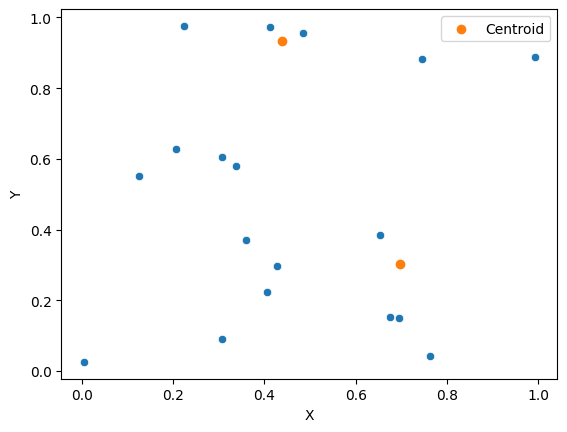

In [178]:
sns.scatterplot(x=df["X"], y=df["Y"])
plt.scatter(x=[c1[0], c2[0]], y=[c1[1], c2[1]], label="Centroid")
plt.legend()
plt.show()

In [179]:
# Find the distance from every point to both the centroids

In [180]:
dist_c1 = np.sqrt(np.square(c1[0]-df["X"]) + np.square(c1[1]-df["Y"]))
dist_c2 = np.sqrt(np.square(c2[0]-df["X"]) + np.square(c2[1]-df["Y"]))

In [181]:
dist_c1

0     0.492909
1     0.622823
2     0.269516
3     0.823156
4     0.442190
5     0.268794
6     0.453925
7     0.728633
8     0.687485
9     0.343396
10    0.000000
11    0.655652
12    0.300721
13    0.093824
14    0.589230
15    0.744987
16    0.151358
17    0.680660
18    0.149439
19    0.581956
dtype: float64

In [182]:
dist_c2

0     0.352446
1     0.492600
2     0.636383
3     0.219360
4     0.850854
5     0.947523
6     0.364837
7     0.048825
8     0.052755
9     0.566420
10    0.680660
11    0.555013
12    0.710498
13    0.587343
14    0.382181
15    1.004730
16    0.822383
17    0.000000
18    0.812840
19    0.310215
dtype: float64

In [183]:
new_df = df.copy()

In [184]:
new_df["Dist_C1"] = dist_c1
new_df["Dist_C2"] = dist_c2

In [185]:
new_df

,X,Y,Dist_C1,Dist_C2
0,0.307479,0.604840,0.492909,0.352446
1,0.125737,0.551497,0.622823,0.492600
2,0.426984,0.295713,0.269516,0.636383
3,0.223677,0.975918,0.823156,0.219360
4,0.307710,0.091262,0.442190,0.850854
5,0.762110,0.041407,0.268794,0.947523
6,0.338453,0.581165,0.453925,0.364837
7,0.411747,0.972771,0.728633,0.048825
8,0.485390,0.956346,0.687485,0.052755
9,0.360032,0.371044,0.343396,0.566420


In [186]:
cluster=[]
for i in range(len(new_df)):
    if new_df["Dist_C1"][i]<new_df["Dist_C2"][i]:
        cluster.append("C1")
    else:
        cluster.append("C2")

In [187]:
cluster

['C2',
 'C2',
 'C1',
 'C2',
 'C1',
 'C1',
 'C2',
 'C2',
 'C2',
 'C1',
 'C1',
 'C2',
 'C1',
 'C1',
 'C2',
 'C1',
 'C1',
 'C2',
 'C1',
 'C2']

In [188]:
new_df["Cluster"]=cluster

In [189]:
new_df

,X,Y,Dist_C1,Dist_C2,Cluster
0,0.307479,0.604840,0.492909,0.352446,C2
1,0.125737,0.551497,0.622823,0.492600,C2
2,0.426984,0.295713,0.269516,0.636383,C1
3,0.223677,0.975918,0.823156,0.219360,C2
4,0.307710,0.091262,0.442190,0.850854,C1
5,0.762110,0.041407,0.268794,0.947523,C1
6,0.338453,0.581165,0.453925,0.364837,C2
7,0.411747,0.972771,0.728633,0.048825,C2
8,0.485390,0.956346,0.687485,0.052755,C2
9,0.360032,0.371044,0.343396,0.566420,C1


In [190]:
new_df[new_df["Cluster"]=="C1"]

,X,Y,Dist_C1,Dist_C2,Cluster
2,0.426984,0.295713,0.269516,0.636383,C1
4,0.307710,0.091262,0.442190,0.850854,C1
5,0.762110,0.041407,0.268794,0.947523,C1
9,0.360032,0.371044,0.343396,0.566420,C1
10,0.696425,0.302052,0.000000,0.680660,C1
12,0.406495,0.222217,0.300721,0.710498,C1
13,0.652673,0.385051,0.093824,0.587343,C1
15,0.004526,0.025862,0.744987,1.004730,C1
16,0.695300,0.150698,0.151358,0.822383,C1
18,0.674711,0.154200,0.149439,0.812840,C1


In [191]:
new_df[new_df["Cluster"]=="C2"]

,X,Y,Dist_C1,Dist_C2,Cluster
0,0.307479,0.604840,0.492909,0.352446,C2
1,0.125737,0.551497,0.622823,0.492600,C2
3,0.223677,0.975918,0.823156,0.219360,C2
6,0.338453,0.581165,0.453925,0.364837,C2
7,0.411747,0.972771,0.728633,0.048825,C2
8,0.485390,0.956346,0.687485,0.052755,C2
11,0.991812,0.887395,0.655652,0.555013,C2
14,0.206033,0.628712,0.589230,0.382181,C2
17,0.438594,0.931990,0.680660,0.000000,C2
19,0.744754,0.881998,0.581956,0.310215,C2


In [192]:
new_c1 = new_df[new_df["Cluster"]=="C1"][["X", "Y"]].mean()

In [193]:
new_c2 = new_df[new_df["Cluster"]=="C2"][["X", "Y"]].mean()

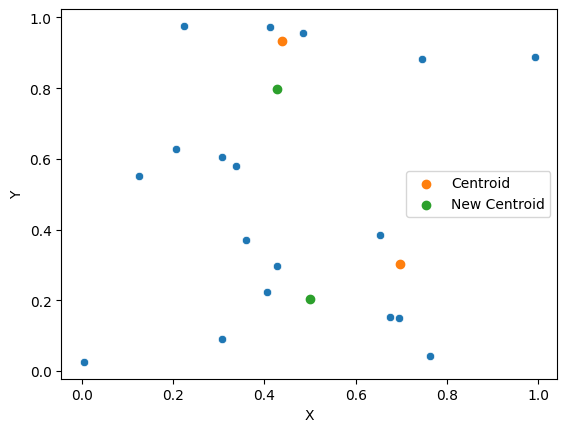

In [194]:
sns.scatterplot(x=df["X"], y=df["Y"])
plt.scatter(x=[c1[0], c2[0]], y=[c1[1], c2[1]], label="Centroid")
plt.scatter(x=[new_c1[0], new_c2[0]], y=[new_c1[1], new_c2[1]], label="New Centroid")
plt.legend()
plt.show()

In [195]:
dist_c1 = np.sqrt(np.square(new_c1[0]-df["X"]) + np.square(new_c1[1]-df["Y"]))
dist_c2 = np.sqrt(np.square(new_c2[0]-df["X"]) + np.square(new_c2[1]-df["Y"]))

In [196]:
new_df["Dist_C1"] = dist_c1
new_df["Dist_C2"] = dist_c2

In [197]:
new_df

,X,Y,Dist_C1,Dist_C2,Cluster
0,0.307479,0.604840,0.444158,0.226716,C2
1,0.125737,0.551497,0.509792,0.389079,C2
2,0.426984,0.295713,0.116460,0.501551,C1
3,0.223677,0.975918,0.819494,0.270938,C2
4,0.307710,0.091262,0.221754,0.716069,C1
5,0.762110,0.041407,0.309527,0.826662,C1
6,0.338453,0.581165,0.409840,0.233675,C2
7,0.411747,0.972771,0.773722,0.176202,C2
8,0.485390,0.956346,0.752513,0.169334,C2
9,0.360032,0.371044,0.217136,0.431505,C1


In [198]:
cluster=[]
for i in range(len(new_df)):
    if new_df["Dist_C1"][i]<new_df["Dist_C2"][i]:
        cluster.append("C1")
    else:
        cluster.append("C2")

In [199]:
new_df["Cluster"]=cluster

In [200]:
new_df

,X,Y,Dist_C1,Dist_C2,Cluster
0,0.307479,0.604840,0.444158,0.226716,C2
1,0.125737,0.551497,0.509792,0.389079,C2
2,0.426984,0.295713,0.116460,0.501551,C1
3,0.223677,0.975918,0.819494,0.270938,C2
4,0.307710,0.091262,0.221754,0.716069,C1
5,0.762110,0.041407,0.309527,0.826662,C1
6,0.338453,0.581165,0.409840,0.233675,C2
7,0.411747,0.972771,0.773722,0.176202,C2
8,0.485390,0.956346,0.752513,0.169334,C2
9,0.360032,0.371044,0.217136,0.431505,C1


In [201]:
new_c1_s2 = new_df[new_df["Cluster"]=="C1"][["X", "Y"]].mean()
new_c2_s2 = new_df[new_df["Cluster"]=="C2"][["X", "Y"]].mean()

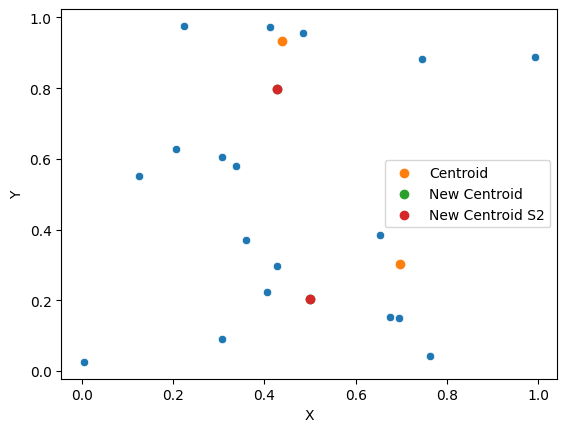

In [202]:
sns.scatterplot(x=df["X"], y=df["Y"])
plt.scatter(x=[c1[0], c2[0]], y=[c1[1], c2[1]], label="Centroid")
plt.scatter(x=[new_c1[0], new_c2[0]], y=[new_c1[1], new_c2[1]], label="New Centroid")
plt.scatter(x=[new_c1_s2[0], new_c2_s2[0]], y=[new_c1_s2[1], new_c2_s2[1]], label="New Centroid S2")
plt.legend()
plt.show()

In [203]:
new_c1

X    0.498696
Y    0.203951
dtype: float64

In [204]:
new_c1_s2

X    0.498696
Y    0.203951
dtype: float64

In [205]:
new_c2

X    0.427368
Y    0.797263
dtype: float64

In [206]:
new_c2_s2

X    0.427368
Y    0.797263
dtype: float64

In [209]:
a = new_df[new_df["Cluster"]=="C1"][["X", "Y"]]

In [210]:
b = new_df[new_df["Cluster"]=="C2"][["X", "Y"]]

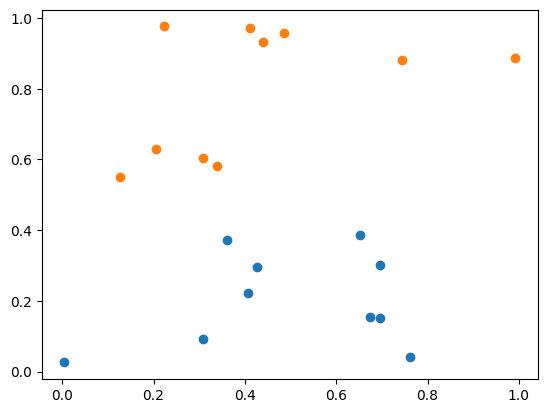

In [211]:
plt.scatter(a["X"], a["Y"])
plt.scatter(b["X"], b["Y"])